In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing 
housing =fetch_california_housing()
df= pd.DataFrame(housing.data,columns=housing.feature_names)
df['Price']=housing.target
## EDA
    ## correlation
        ## more towords +1 is higly coreelated and more -1 in less correlated 
## if two feature are more correlated withe each other (around 8 to 9)we remove one of its feature
## leanearty should be there in the model bt x and y

#df.corr()
##sns.pairplot(df)
##plt.scatter(df['MedInc'],df['Price'])
##sns.regplot(x="MedInc",y="Price",data=df)





## Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Standardize the datasets 
## as our main goal is to reach as colse to glodel minima 
## all the data is calculated wrt to diffreent units 


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
## same with the test data set also but some difference that is the same technic is to be use to transform the test dataset as done by the train data set
## and to make sure that model does not know about the test data set
X_test=scaler.transform(X_test)
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))





### MODEL TRAINING
from sklearn.linear_model import LinearRegression

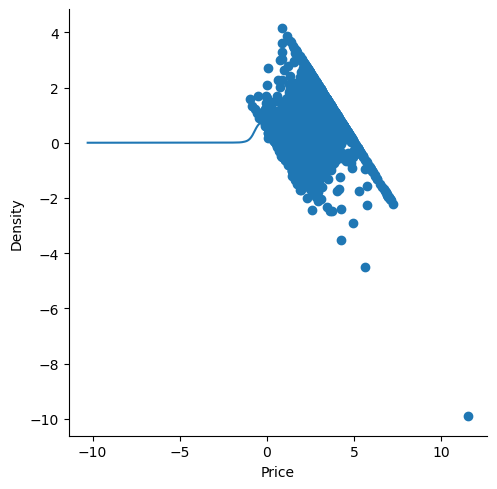

In [4]:

reg = LinearRegression()
## creating a hyperplane by useing fit()
reg.fit(X_train,y_train)

## print the coefficients and intercept 
#print(reg.coef_)
## these number shows that the increse in one feature by one has increses 8* in price
#print(reg.intercept_)
reg_pred=reg.predict(X_test)
#reg_pred


##plot a scatter plot for the prediction
#plt.scatter(y_test,reg_pred)

## residuals 
 ## it is the margen of error bt test data set and the predicred 

residuals=y_test-reg_pred
## ploting the residual 
sns.displot(residuals,kind="kde")
## scatter plot with respect to prediction and residual 
plt.scatter(reg_pred,residuals)




## performance  matrix

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print( mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
## root mean squared error
print(np.sqrt( mean_squared_error(y_test,reg_pred)))

0.5369686543372463
0.529571010668445
0.7327814505957737


In [6]:
## R square and adjsted 
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)
## more towords to +1 instead is good

0.5970494128783951


In [7]:
## adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
## adjusted r2 shoud be always less then the R square

0.5965755624158091

NEW DATA PREDICTION



In [8]:
## we had allready tested the dataset X_test that is in bulk but in real time the data is in small chunks
housing.data[0].shape
## it's in one dimention. but we train our model for two dim.
housing.data[0].reshape(1,-1)
##reg.predict(housing.data[0].reshape(1,-1))


## but here we miss to standerzing our data
    ##transformation of new data
scaler.transform(housing.data[0].reshape(1,-1))
reg.predict(scaler.transform(housing.data[0].reshape(1,-1)))
                        

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13419021])

pickling the model file for deployment

In [9]:
import pickle
pickle.dump(reg,open('regmodel.pkl','wb'))
## pickle can also be loadedc
pickle_model=pickle.load(open('regmodel.pkl','rb'))
pickle_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))
## same output

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13419021])